In [1]:
import pandas as pd   
import numpy as np   
import matplotlib.pyplot as plt   
import seaborn as sns    

In [3]:
data = pd.read_csv(
    '/home/ryzenrtx/Prince/Projects/Online Payments Fraud Detection with Machine Learning/PS_20174392719_1491204439457_log.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
data.shape 

(6362620, 11)

* <font color='DarkOrange'>step</font> : represents a unit of time where 1 step equals 1 hour
* <font color='Pink'>type</font> : type of online transaction
* <font color='Orange'>amount</font> : the amount of the transaction
* <font color='Yellow'>nameOrig</font> : customer starting the transaction
* <font color='Purple'>oldbalanceOrg</font> : balance before the transaction
* <font color='Green'>newbalanceOrig</font> : balance after the transaction
* <font color='Brown'>nameDest</font> : recipient of the transaction
* <font color='Tomato'>oldbalanceDest</font> : initial balance of recipient before the transaction
* <font color='DarkKhaki'>newbalanceDest</font> : the new balance of recipient after the transaction
* <font color='red'>isFraud</font> : fraud transaction

In [17]:
print(data.isnull().sum()) 

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [18]:
# Exploring transaction type
print(data.type.value_counts()) # 0 - Cash in, 1 - Cash out, 2 - Debit, 3 - Payment, 4 - Transfer

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


In [19]:
import plotly.express as px
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

figure = px.pie(data,
                values=quantity,
                names=transactions, hole=0.5,
                title="Distribution of Transaction Type")
figure.show()

/tmp/ipykernel_22809/1485107492.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

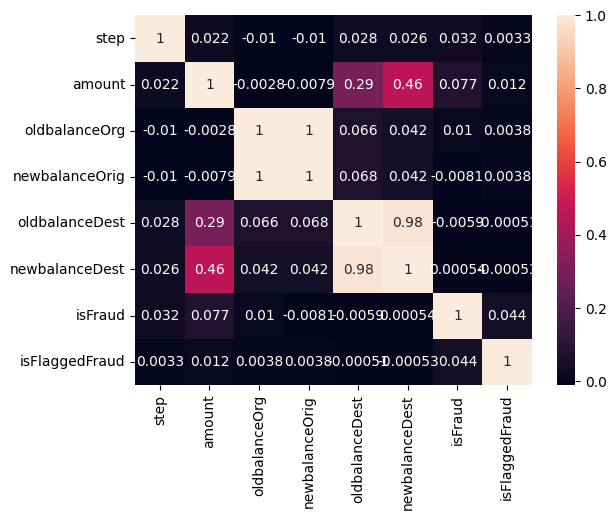

In [20]:
# Checking correlation
correlation = data.corr()
# print(correlation["isFraud"].sort_values(ascending=False))
sns.heatmap(correlation, annot=True)        

In [21]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2, 
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step  type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1     2   9839.64  C1231006815       170136.0       160296.36   
1     1     2   1864.28  C1666544295        21249.0        19384.72   
2     1     4    181.00  C1305486145          181.0            0.00   
3     1     1    181.00   C840083671          181.0            0.00   
4     1     2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0  No Fraud               0  
1  M2044282225             0.0             0.0  No Fraud               0  
2   C553264065             0.0             0.0     Fraud               0  
3    C38997010         21182.0             0.0     Fraud               0  
4  M1230701703             0.0             0.0  No Fraud               0  


In [22]:
# splitting the data
from sklearn.model_selection import train_test_split
x = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

In [23]:
# training a machine learning model
from sklearn.tree import DecisionTreeClassifier
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.10, random_state=42)
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

In [6]:
import pickle
# pickle.dump(mode|l, open("model.pkl", "wb"))

In [7]:
# loading the model                             
model = pickle.load(open("model.pkl", "rb"))


In [9]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict([[4, 181.00, 181.0, 0]])
print(y_pred)

['Fraud']
